# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


591


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
response_json = []
print("Beginning Data Retrieval")
print("--------------------")
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 1 | {cities[x]}")

Beginning Data Retrieval
--------------------
Processing Record 0 of Set 1 | provideniya
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | vao
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | lasa
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | nhulunbuy
Processing Record 14 of Set 1 | tiznit
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | zhangye
Processing Record 17 of Set 1 | miles city
Processing Record 18 of Set 1 | yumen
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | atuona
Processing Record 23

In [4]:
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

for city in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?&appid=2c8925f5da0ee0bed8ce6fa9adb6b87c&units=metric&q={city}"
    response = requests.get(query_url).json()
    #print(response)
    try:
        lat_x=response['coord']['lat']
        lat.append(lat_x)
        lng_x=response['coord']['lon']
        lng.append(lng_x)
        max_temp_x=response['main']['temp_max']
        max_temp.append(max_temp_x)
        humidity_x=response['main']['humidity']
        humidity.append(humidity_x)
        cloudiness_x=response['clouds']['all']
        cloudiness.append(cloudiness_x)
        wind_speed_x=response['wind']['speed']
        wind_speed.append(wind_speed_x)
        country_x=response['sys']['country']
        country.append(country_x)
        date_x=response['dt']
        date.append(date_x)
        name_x=response['name']
        name.append(name_x)  
    except:
        
        #print('City not found')
        
        pass









### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame({
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,4.00,52,0,6.00,RU,1619132497
1,Aklavik,68.2191,-135.0107,-3.00,54,20,2.57,CA,1619132497
2,Ponta do Sol,32.6667,-17.1000,18.33,90,86,2.24,PT,1619132498
3,Saint Paul Harbor,57.7900,-152.4072,6.00,87,90,5.66,US,1619132498
4,Vao,-22.6667,167.4833,23.48,73,32,2.51,NC,1619132499


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.186134,19.493919,15.310936,68.227523,52.722936,3.647303,1.619133e+09
std,33.561472,91.543388,10.933758,23.521571,37.798254,2.580827,8.748001e+01
min,-54.800000,-175.200000,-17.270000,6.000000,0.000000,0.150000,1.619132e+09
25%,-9.800000,-65.712500,7.410000,53.000000,14.000000,1.760000,1.619133e+09
50%,23.400000,25.161100,17.000000,75.000000,61.000000,3.090000,1.619133e+09
75%,46.485600,100.451700,25.000000,87.000000,90.000000,5.000000,1.619133e+09
max,78.218600,178.416700,35.000000,100.000000,100.000000,18.610000,1.619133e+09


In [8]:
weather_data.to_csv('cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
very_humid=weather_data.loc[weather_data['Humidity']>100, :]
very_humid['Humidity'].count()

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

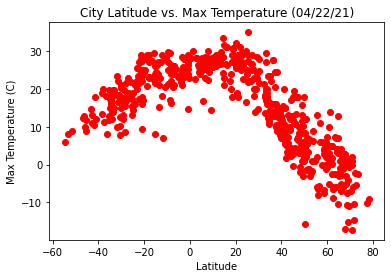

In [12]:
plt.title("City Latitude vs. Max Temperature (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.scatter(lat, max_temp, marker="o", color="red")
plt.show()


In [ ]:
"This plot is analyzing the relationship between a city's latitude and it's max temperature. "

## Latitude vs. Humidity Plot

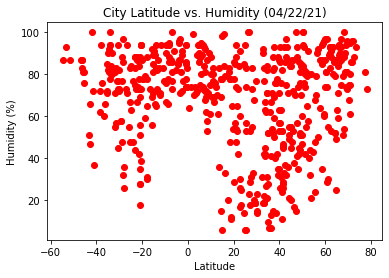

In [13]:
plt.title("City Latitude vs. Humidity (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(lat, humidity, marker="o", color="red")
plt.show()


In [ ]:
"This figure shows the relationship between the City's latitude and its humidity percentage."

## Latitude vs. Cloudiness Plot

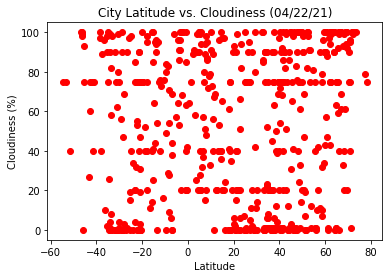

In [14]:
plt.title("City Latitude vs. Cloudiness (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(lat, cloudiness, marker="o", color="red")
plt.show()


In [ ]:
"The plot shows the relationship between the city's latitudinal location and its cloudiness percentage."

## Latitude vs. Wind Speed Plot

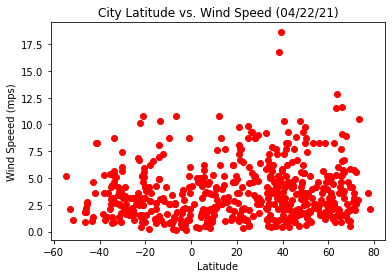

In [15]:
plt.title("City Latitude vs. Wind Speed (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeed (mps)")

plt.scatter(lat, wind_speed, marker="o", color="red")
plt.show()


In [ ]:
"This plot shows the relationship between the city's latitude and wind speed."

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7877491810162012


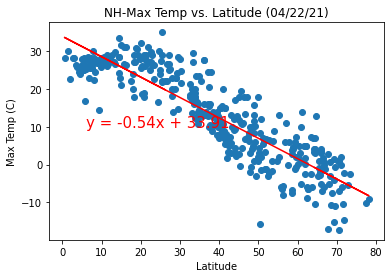

In [16]:
north_hem=weather_data.loc[weather_data['Lat']>0, :]
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH-Max Temp vs. Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4726220124730781


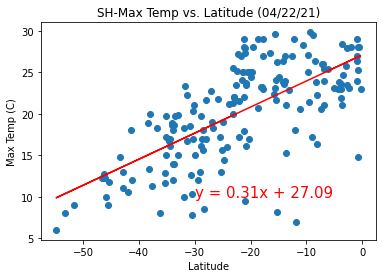

In [17]:
south_hem=weather_data.loc[weather_data['Lat']<0, :]
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.title("SH-Max Temp vs. Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
"There is a stronger correlation between Max Temp and Latitude in the Northern Hemisphere. It might be because there were more cities in the Northern Hemisphere."

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013971927479968652


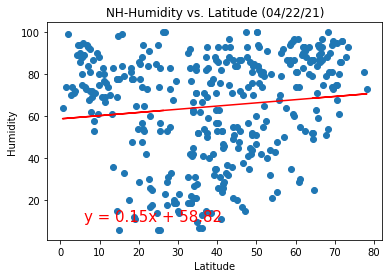

In [18]:
north_hem=weather_data.loc[weather_data['Lat']>0, :]
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH-Humidity vs. Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017521998056595444


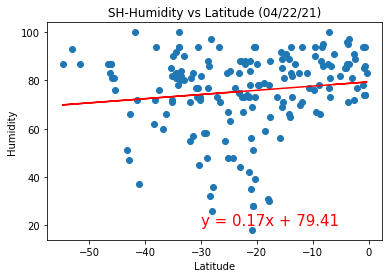

In [19]:
south_hem=weather_data.loc[weather_data['Lat']<0, :]
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("SH-Humidity vs Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
"There seems to be little correlation in both hemispheres between humidity and a city's latitude."

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01978748948850203


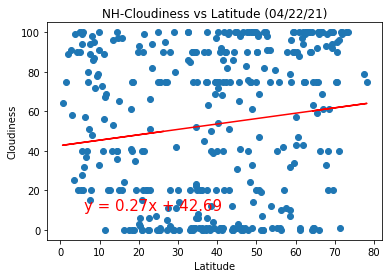

In [20]:
north_hem=weather_data.loc[weather_data['Lat']>0, :]
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH-Cloudiness vs Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0005684461028326682


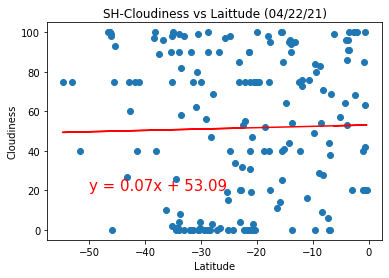

In [21]:
south_hem=weather_data.loc[weather_data['Lat']<0, :]
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("SH-Cloudiness vs Laittude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
"There is very little correlation between the cloudiness and latitude of a city."

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0030759180558600904


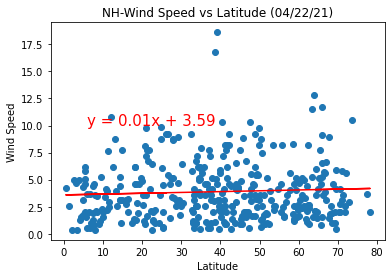

In [22]:
north_hem=weather_data.loc[weather_data['Lat']>0, :]
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH-Wind Speed vs Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003794780745429205


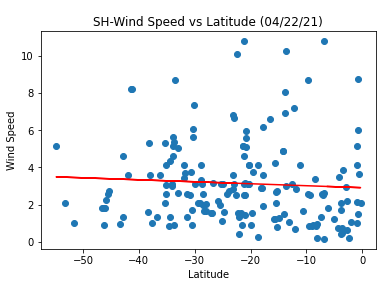

In [23]:
south_hem=weather_data.loc[weather_data['Lat']<0, :]
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")
plt.title("SH-Wind Speed vs Latitude (04/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
"Both Northern and Southern Hemispheres are very little correlation between latitude and wind speed.